# *This python file contains the complete code for soil composition prediction using GPR with all description and instructions necessary to understand and implement it*

# **The instructions given in bold are to be followed before the corresponding code cell**

Estimated time to run

Part 0: 5 mins

Part 1: 5 mins

Part 2: 8 mins

Part 3: 1hr 30 mins

Part 4: 15 mins

Part 5: 5 mins

Part 6: 15 mins





---



---



---



---



## Part 0: Loading Libraries, Drive, Vizualization of Data

Importing Necessary Libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tiff
from pathlib import Path

In [2]:
import os
import scipy.io
import numpy as np


Connect Colab to Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Instructions: Extract all the 7 zip files names Croppedimages1 to Croppedimages7 and upload to drive**

In [ ]:
import os
import shutil

# Path to the main Croppedimages folder where everything will be combined
destination_folder = '/content/drive/My Drive/Croppedimages'

# List of folders to combine (Croppedimages1 to Croppedimages7)
source_folders = [
    '/content/drive/My Drive/Croppedimages1',
    '/content/drive/My Drive/Croppedimages2',
    '/content/drive/My Drive/Croppedimages3',
    '/content/drive/My Drive/Croppedimages4',
    '/content/drive/My Drive/Croppedimages5',
    '/content/drive/My Drive/Croppedimages6',
    '/content/drive/My Drive/Croppedimages7'
]

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move all subfolders from each CroppedimagesX folder to the main Croppedimages folder
for source_folder in source_folders:
    for subfolder_name in os.listdir(source_folder):
        source_subfolder_path = os.path.join(source_folder, subfolder_name)
        destination_subfolder_path = os.path.join(destination_folder, subfolder_name)

        if os.path.exists(source_subfolder_path):
            shutil.move(source_subfolder_path, destination_subfolder_path)
            print(f"Moved {subfolder_name} from {source_folder} to {destination_folder}")

print("Folders combined successfully!")


### *Vizualization of Cropped images*

Change the folder name at the end of the code to see images of that corresponding folder

*There are a total of 62 folders in the dataset - each with 3 samples and and each sample with 5 bands --- So, when you choose a folder to view, you will get a total of 3 x 5 = 15 images*

Displaying images for: 45 -> 0291


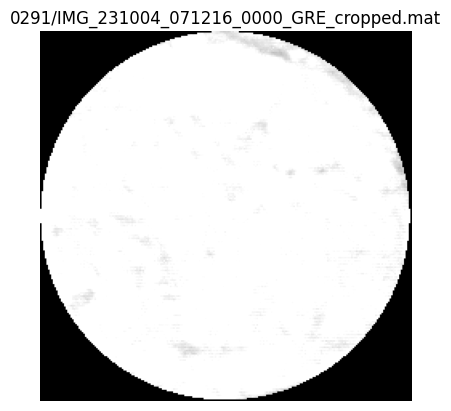

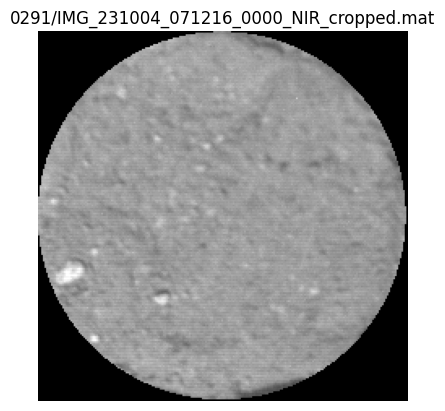

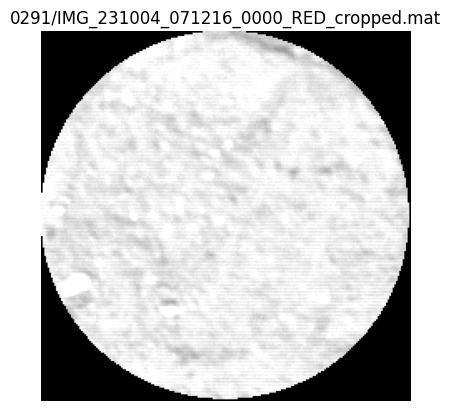

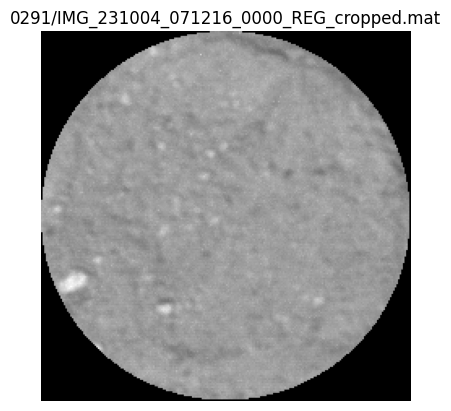

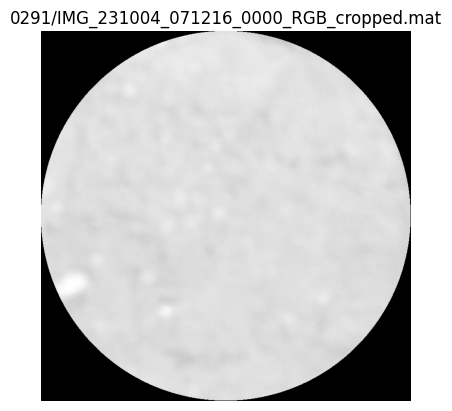

Displaying images for: 45 -> 0292


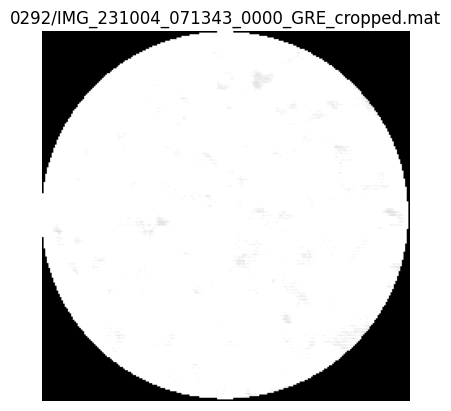

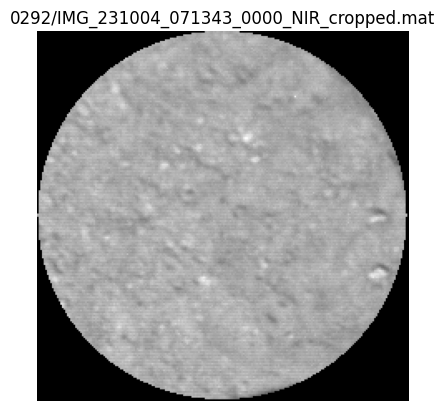

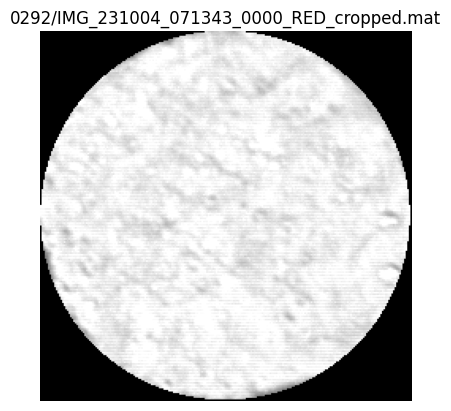

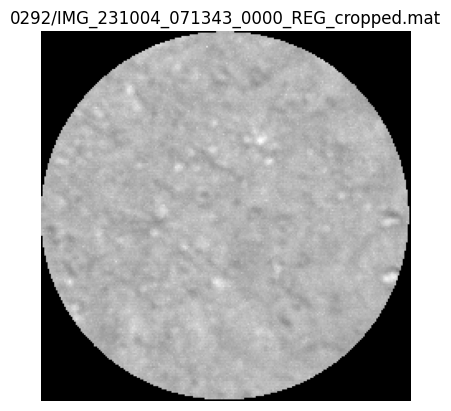

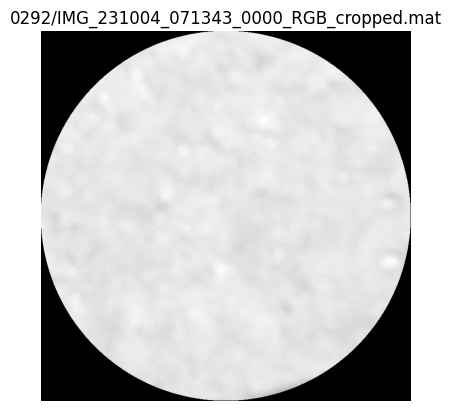

Displaying images for: 45 -> 0293


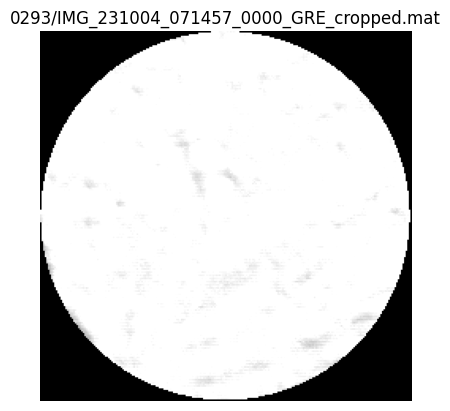

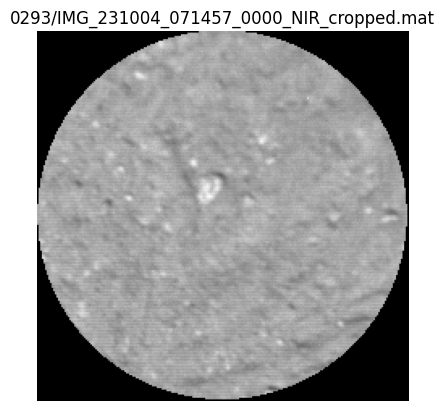

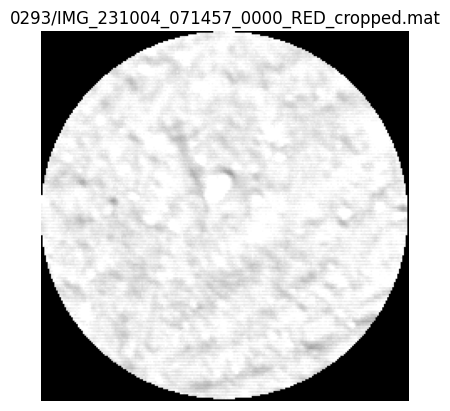

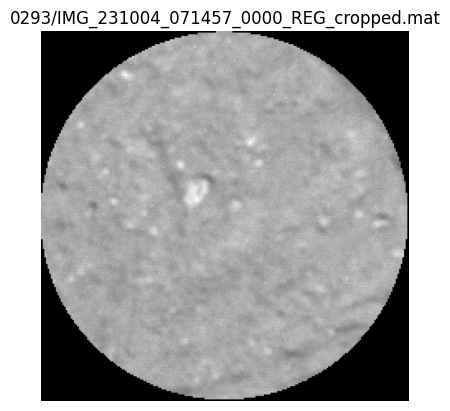

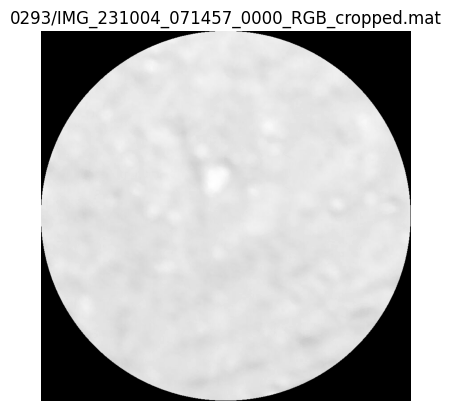

In [4]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

# Function to display images from a specific folder
def display_images_from_folder(main_directory, folder_name):
    # Define the path to the selected folder
    folder_path = os.path.join(main_directory, folder_name)

    # List the subfolders (representing the 3 samples)
    subfolders = sorted(os.listdir(folder_path))

    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        print(f"Displaying images for: {folder_name} -> {subfolder}")

        # List the .mat files representing the 5 bands in the subfolder
        mat_files = sorted([f for f in os.listdir(subfolder_path) if f.endswith('.mat')])

        # Display each .mat file as an image
        for mat_file in mat_files:
            mat_file_path = os.path.join(subfolder_path, mat_file)
            mat_contents = sio.loadmat(mat_file_path)

            # Assuming the variable name in the .mat file is 'croppedImg'
            if 'croppedImg' in mat_contents:
                image_data = mat_contents['croppedImg']

                # If it's a 3D array (like RGB), convert it to grayscale
                if image_data.ndim == 3:
                    image_data = np.mean(image_data, axis=2)

                # Display the image
                plt.figure()
                plt.title(f"{subfolder}/{mat_file}")
                plt.imshow(image_data, cmap='gray')
                plt.axis('off')
                plt.show()
            else:
                print(f"Variable 'croppedImg' not found in {mat_file_path}")

# Define the main directory and folder to display
main_directory = '/content/drive/My Drive/Croppedimages'  # Change this to your path
folder_name = '45'  # Replace with the specific folder you want to display (like '1', '2', etc.)

# Display images for the selected folder
display_images_from_folder(main_directory, folder_name)


## Part 1: RGB to R, G and B bands

In [5]:
import os
import shutil
import scipy.io as sio

# Define directories
original_dir = '/content/drive/My Drive/Croppedimages'
new_dir = '/content/drive/My Drive/Croppedimageswithrgb'

# Create new directory
os.makedirs(new_dir, exist_ok=True)

def save_channel_as_mat(channel_data, save_path):
    sio.savemat(save_path, {'croppedImg': channel_data})

# Iterate over the original directory
for folder in os.listdir(original_dir):
    folder_path = os.path.join(original_dir, folder)
    new_folder_path = os.path.join(new_dir, folder)
    os.makedirs(new_folder_path, exist_ok=True)

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        new_subfolder_path = os.path.join(new_folder_path, subfolder)
        os.makedirs(new_subfolder_path, exist_ok=True)

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            new_file_path = os.path.join(new_subfolder_path, file)

            if 'RGB_cropped.mat' in file:
                mat_contents = sio.loadmat(file_path)
                rgb_image = mat_contents['croppedImg']

                # Extract R, G, B channels
                R_channel = rgb_image[:, :, 0]
                G_channel = rgb_image[:, :, 1]
                B_channel = rgb_image[:, :, 2]

                # Save R, G, B channels as separate .mat files
                save_channel_as_mat(R_channel, new_file_path.replace('RGB_cropped.mat', 'R_cropped.mat'))
                save_channel_as_mat(G_channel, new_file_path.replace('RGB_cropped.mat', 'G_cropped.mat'))
                save_channel_as_mat(B_channel, new_file_path.replace('RGB_cropped.mat', 'B_cropped.mat'))

            else:
                # Copy other files as they are
                shutil.copy(file_path, new_file_path)

print("Processing completed and files copied to the new directory.")


Processing completed and files copied to the new directory.


The folder Croppedimageswithrgb is now uploaded into your drive

## Part 2: Divinding the image to 10 Subblocks for each band

In [6]:
def create_subblocks(image, block_size=100, num_subblocks=10, overlap_ratio=0.9):
    h, w = image.shape
    step_size = int(block_size * (1 - overlap_ratio))
    subblocks = []

    # Start from the center
    center_x, center_y = h // 2, w // 2

    for i in range(-int(np.sqrt(num_subblocks))//2, int(np.sqrt(num_subblocks))//2 + 1):
        for j in range(-int(np.sqrt(num_subblocks))//2, int(np.sqrt(num_subblocks))//2 + 1):
            start_x = center_x + i * step_size - block_size // 2
            start_y = center_y + j * step_size - block_size // 2
            if start_x >= 0 and start_x + block_size <= h and start_y >= 0 and start_y + block_size <= w:
                subblock = image[start_x:start_x + block_size, start_y:start_y + block_size]
                subblocks.append(subblock)
            if len(subblocks) >= num_subblocks:
                return subblocks

    return subblocks

In [7]:
def process_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for folder in sorted(os.listdir(input_directory)):
        folder_path = os.path.join(input_directory, folder)
        if os.path.isdir(folder_path):
            output_folder_path = os.path.join(output_directory, folder)
            if not os.path.exists(output_folder_path):
                os.makedirs(output_folder_path)

            for subfolder in sorted(os.listdir(folder_path)):
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):
                    output_subfolder_path = os.path.join(output_folder_path, subfolder)
                    if not os.path.exists(output_subfolder_path):
                        os.makedirs(output_subfolder_path)

                    for mat_file in sorted(os.listdir(subfolder_path)):
                        if mat_file.endswith('.mat'):
                            mat_file_path = os.path.join(subfolder_path, mat_file)
                            mat_contents = scipy.io.loadmat(mat_file_path)
                            if 'croppedImg' in mat_contents:
                                image_data = mat_contents['croppedImg']
                                if image_data.ndim == 3:
                                    image_data = np.mean(image_data, axis=2)
                                subblocks = create_subblocks(image_data)

                                band_folder = os.path.join(output_subfolder_path, os.path.splitext(mat_file)[0])
                                if not os.path.exists(band_folder):
                                    os.makedirs(band_folder)

                                for i, subblock in enumerate(subblocks):
                                    subblock_filename = f"{os.path.splitext(mat_file)[0]}_subblock_{i+1}.mat"
                                    subblock_path = os.path.join(band_folder, subblock_filename)
                                    scipy.io.savemat(subblock_path, {'subblock': subblock})
                                    print(f"Saved subblock: {subblock_path}")

In [8]:
input_directory = "/content/drive/My Drive/Croppedimageswithrgb"
output_directory = "/content/drive/My Drive/Subblocks10"

In [ ]:
process_directory(input_directory, output_directory)

Streaming output truncated to the last 5000 lines.
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_G_cropped/IMG_231004_063827_0000_G_cropped_subblock_7.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_G_cropped/IMG_231004_063827_0000_G_cropped_subblock_8.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_G_cropped/IMG_231004_063827_0000_G_cropped_subblock_9.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_G_cropped/IMG_231004_063827_0000_G_cropped_subblock_10.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_NIR_cropped/IMG_231004_063827_0000_NIR_cropped_subblock_1.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_NIR_cropped/IMG_231004_063827_0000_NIR_cropped_subblock_2.mat
Saved subblock: /content/drive/My Drive/Subblocks10/39/0275/IMG_231004_063827_0000_NIR_cropped

The folder Subblocks10 is now uploaded into your drive

## Part 3: Gram Matrix Formulation

In [ ]:
import numpy as np
import os
import scipy.io

def create_column_vector(subblocks, total_size=10000):
    vectors = []
    for subblock in subblocks:
        if subblock is not None:
            vectors.append(subblock.flatten())
        else:
            vectors.append(np.zeros(total_size))
    combined_vector = np.concatenate(vectors)
    return combined_vector

def process_directory_in_chunks(input_directory, chunk_size=10):
    subfolders = sorted(os.listdir(input_directory))
    num_subfolders = len(subfolders)
    gram_matrix_chunks = []

    for chunk_start in range(0, num_subfolders, chunk_size):
        chunk_end = min(chunk_start + chunk_size, num_subfolders)
        gram_matrix_chunk = []

        for folder in subfolders[chunk_start:chunk_end]:
            folder_path = os.path.join(input_directory, folder)
            samples = sorted(os.listdir(folder_path))

            for sample in samples:
                sample_path = os.path.join(folder_path, sample)
                bands = sorted(os.listdir(sample_path))
                subblocks_dict = {band: [] for band in bands}

                for band in bands:
                    band_path = os.path.join(sample_path, band)
                    subblock_files = sorted([os.path.join(band_path, f) for f in os.listdir(band_path) if f.endswith('.mat')])

                    for subblock_file in subblock_files:
                        try:
                            mat_contents = scipy.io.loadmat(subblock_file)
                            subblock_data = mat_contents.get('subblock', None)
                            if subblock_data is not None:
                                subblocks_dict[band].append(subblock_data)
                            else:
                                subblocks_dict[band].append(None)
                        except Exception as e:
                            subblocks_dict[band].append(None)
                            print(f"Error loading {subblock_file}: {e}")

                for subblock_idx in range(10):
                    subblocks = [subblocks_dict[band][subblock_idx] if len(subblocks_dict[band]) > subblock_idx else None for band in bands]

                    # If a whole band is missing, replace it with zeros
                    for i, subblock in enumerate(subblocks):
                        if subblock is None:
                            subblocks[i] = np.zeros((100, 100))

                    column_vector = create_column_vector(subblocks)
                    if column_vector.size == 70000:  # Ensure the column vector is the correct size
                        gram_matrix_chunk.append(column_vector)

        if gram_matrix_chunk:  # Ensure chunk is not empty before converting to array
            gram_matrix_chunk = np.array(gram_matrix_chunk).T
            chunk_file = f'gram_matrix_chunk_{chunk_start}_{chunk_end}.npy'
            np.save(chunk_file, gram_matrix_chunk)
            gram_matrix_chunks.append(chunk_file)
            print(f'Saved chunk: {chunk_file}')

    return gram_matrix_chunks

def merge_chunks(chunk_files, output_file):
    gram_matrix = []
    for chunk_file in chunk_files:
        chunk = np.load(chunk_file)
        gram_matrix.append(chunk)
    gram_matrix = np.concatenate(gram_matrix, axis=1)
    np.save(output_file, gram_matrix)
    print(f'Final gram matrix saved to {output_file}')

def make_gram_matrix_downloadable(output_file):
    import shutil
    from google.colab import files

    shutil.move(output_file, "/content/gram_matrix.npy")
    files.download("/content/gram_matrix.npy")

# Define input and output paths
input_directory = "/content/drive/My Drive/Subblocks10"
output_file = "gram_matrix.npy"

# Process directory in chunks
chunk_files = process_directory_in_chunks(input_directory)

# Merge all chunks into a final gram matrix
merge_chunks(chunk_files, output_file)

# Make the final gram matrix downloadable
make_gram_matrix_downloadable(output_file)


The gram matrix will be downloaded to your system in numpy format

# **Instruction: Upload gram_matrix.npy to your drive**

In [ ]:
import numpy as np
import pandas as pd

# Load the numpy file from Google Drive
npy_file_path = "/content/drive/My Drive/gram_matrix.npy"
gram_matrix = np.load(npy_file_path)

# Convert the numpy array to a DataFrame
df = pd.DataFrame(gram_matrix)

# Save the DataFrame to a CSV file
csv_file_path = "/content/gram_matrix.csv"
df.to_csv(csv_file_path, index=False)

# Create a download link for the CSV file
from google.colab import files
files.download(csv_file_path)


The gram matrix will be downloaded to your system in csv format - which we can view in excel

## Part 4: Fast PCA to get reduced data

In [ ]:
import numpy as np

# Load the Gram matrix from the .npy file
file_path = '/content/drive/My Drive/gram_matrix.npy'
M = np.load(file_path)

# Check the shape of the loaded matrix to confirm
print("Shape of Gram matrix:", M.shape)

# Step 1: Calculate I = M^T M
M_T = M.T
I = np.dot(M_T, M)

# Step 2: Compute the Covariance Matrix of I
I_centered = I - np.mean(I, axis=0)
cov_I = np.cov(I_centered, rowvar=False)

# Step 3: Compute the Pseudoinverse of I
I_pinv = np.linalg.pinv(I)

# Step 4: Calculate the Eigenvectors and Eigenvalues of I_pinv * cov_I
eigvals, eigvecs = np.linalg.eig(np.dot(I_pinv, cov_I))

# Sorting eigenvalues and eigenvectors
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Print the results
print("Eigenvalues:")
print(eigvals)
print("\nEigenvectors:")
print(eigvecs)


In [ ]:
# Save the results
np.save('eigvals.npy', eigvals)
np.save('eigvecs.npy', eigvecs)

In [ ]:
# Plot the Cumulative Normalized Eigenvalues
def plot_cumulative_normalized_eigenvalues(eigenvalues, threshold=0.80):
    sorted_eigenvalues = np.sort(np.abs(eigenvalues))[::-1]  # Sort in descending order
    cumulative_sum = np.cumsum(sorted_eigenvalues)
    total_sum = cumulative_sum[-1]
    normalized_cumulative_sum = cumulative_sum / total_sum

    plt.figure(figsize=(10, 6))
    plt.plot(normalized_cumulative_sum, marker='o')
    plt.title('Cumulative Normalized Eigenvalues')
    plt.xlabel('Number of Eigenvalues')
    plt.ylabel('Cumulative Normalized Sum')
    plt.grid(True)
    plt.show()

    num_eigenvalues = np.searchsorted(normalized_cumulative_sum, threshold) + 1
    return num_eigenvalues

num_eigenvalues_for_80 = plot_cumulative_normalized_eigenvalues(eigvals, threshold=0.80)
print(f'Number of eigenvalues needed to reach 80% variance: {num_eigenvalues_for_80}')

In [ ]:
# Select Eigenvectors Corresponding to Top Eigenvalues
top_eigenvectors = eigvecs[:, :num_eigenvalues_for_80]

In [ ]:
# Step 5: Compute New Basis Vectors
V = np.dot(gram_matrix, top_eigenvectors)

# Step 6: Construct the Dimensionally Reduced Data
def construct_reduced_data(V, gram_matrix):
    V_T = V.T
    reduced_data = np.dot(V_T, gram_matrix)
    return reduced_data

reduced_data = construct_reduced_data(V, gram_matrix)

# Save the reduced data and make it downloadable
np.save('/content/reduced_data.npy', reduced_data)

In [ ]:
# Create a link to download the reduced data
from google.colab import files
files.download('/content/reduced_data.npy')

print('Shape of reduced data:', reduced_data.shape)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Load the reduced data from the drive
reduced_data_path = '/content/drive/My Drive/reduced_data.npy'
reduced_data = np.load(reduced_data_path)

# Normalize the reduced data
scaler = MinMaxScaler()
normalized_reduced_data = scaler.fit_transform(reduced_data)

# Check the shape and range of the normalized data
print("Normalized reduced data shape:", normalized_reduced_data.shape)
print("Min value:", normalized_reduced_data.min())
print("Max value:", normalized_reduced_data.max())

# Save the normalized reduced data to a CSV file
normalized_reduced_data_path = 'normalized_reduced_data.csv'
np.savetxt(normalized_reduced_data_path, normalized_reduced_data, delimiter=',')

# Automatically download the file
files.download(normalized_reduced_data_path)


The normalized reduced data is downloaded to your system in csv format, which can be viewed in excel

In [ ]:
# Save the normalized reduced data to a Numpy file
normalized_reduced_data_npy_path = 'normalized_reduced_data.npy'
np.save(normalized_reduced_data_npy_path, normalized_reduced_data)

# Automatically download the Numpy file
files.download(normalized_reduced_data_npy_path)


# **Instruction: Upload the normalized_reduced_data.npy and normalized_reduced_data.csv to your drive**

## Part 5: Target Matrix Formulation

# **Instruction: Upload the Targetsoil.xlsx file to your drive**

In [ ]:
import pandas as pd
import numpy as np

# Load the target soil data from the Excel file
file_path = '/content/drive/My Drive/Targetsoil.xlsx'
df = pd.read_excel(file_path)

# Extract the proportions of sand, silt, and clay
proportions = df[['Sand_N', 'Silt_N', 'Clay_N']].values

# Initialize the target matrix with zeros
num_proportions = proportions.shape[0]
num_subblocks_per_sample = 10
num_samples_per_proportion = 3
total_columns_ideal = num_proportions * num_samples_per_proportion * num_subblocks_per_sample

# Adjust the number of columns to match the actual data
total_columns_actual = 1840
if total_columns_actual < total_columns_ideal:
    missing_columns = total_columns_ideal - total_columns_actual
    print(f"Missing columns: {missing_columns}")
else:
    missing_columns = 0

# Initialize the target matrix with zeros
target_matrix = np.zeros((3, total_columns_actual))

# Fill the target matrix with the proportion values
column_index = 0
for i in range(num_proportions):
    for _ in range(num_samples_per_proportion):
        for _ in range(num_subblocks_per_sample):
            if column_index < total_columns_actual:
                target_matrix[:, column_index] = proportions[i]
                column_index += 1

# Save the target matrix to a CSV file
target_matrix_file_path = '/content/drive/My Drive/target_matrix.csv'
np.savetxt(target_matrix_file_path, target_matrix, delimiter=',')

# Make the target matrix downloadable
from google.colab import files
files.download(target_matrix_file_path)

print(f"Target matrix saved to {target_matrix_file_path}")
print("Download initiated.")


The target matrix in csv format is downloaded into your system

In [ ]:
# Check the size of the target matrix
print("Target matrix shape:", target_matrix.shape)


In [ ]:
import pandas as pd
import numpy as np

# Load the target matrix from CSV
target_file_path = '/content/drive/My Drive/target_matrix.csv'  # Correct file name
target_df = pd.read_csv(target_file_path, header=None)

# Convert to numpy array and transpose to match the expected shape (3, 1840)
target_matrix = target_df.to_numpy()

# Check the shape of the target matrix
print('Shape of target matrix:', target_matrix.shape)

# Ensure the target matrix is of shape (3, 1840)
if target_matrix.shape[0] != 3:
    target_matrix = target_matrix.T

print('Updated shape of target matrix:', target_matrix.shape)


# **Instruction: Upload the target_matrix.csv to your drive**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the normalized reduced data
normalized_reduced_data_path = '/content/drive/My Drive/normalized_reduced_data.csv'
normalized_reduced_data = pd.read_csv(normalized_reduced_data_path, header=None).to_numpy()

# Load the target matrix
target_file_path = '/content/drive/My Drive/target_matrix.csv'
target_df = pd.read_csv(target_file_path, header=None)
target_matrix = target_df.to_numpy()

# Ensure the target matrix is of shape (3, 1840)
if target_matrix.shape[0] != 3:
    target_matrix = target_matrix.T

print('Shape of normalized reduced data:', normalized_reduced_data.shape)
print('Shape of target matrix:', target_matrix.shape)

## Part 6: Gaussian process Regression

In [ ]:
# Split the data into training and testing sets
train_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split(
    normalized_reduced_data.T, target_matrix.T, train_size=train_ratio, random_state=42
)

# Define the kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

In [ ]:
# Train the Gaussian Process model for each target variable
models = []
for i in range(y_train.shape[1]):
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
    gpr.fit(X_train, y_train[:, i])
    models.append(gpr)

# Predict and evaluate the model
y_pred = np.zeros_like(y_test)
for i, gpr in enumerate(models):
    y_pred[:, i] = gpr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

## *Plotting the result in graphs*

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='True Sand')
plt.plot(y_pred[:, 0], label='Predicted Sand')
plt.legend()
plt.title('Sand Prediction')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='True Silt')
plt.plot(y_pred[:, 1], label='Predicted Silt')
plt.legend()
plt.title('Silt Prediction')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='True Clay')
plt.plot(y_pred[:, 2], label='Predicted Clay')
plt.legend()
plt.title('Clay Prediction')
plt.show()

## *The result in numbers*

In [ ]:
import pandas as pd

# Predict the values for the test set
y_pred = np.zeros_like(y_test)
for i, gpr in enumerate(models):
    y_pred[:, i] = gpr.predict(X_test)

# Create a DataFrame to display actual and predicted values side by side
results_df = pd.DataFrame({
    'Sample': range(1, len(y_test) + 1),
    'Actual Clay': y_test[:, 0],
    'Predicted Clay': y_pred[:, 0],
    'Actual Silt': y_test[:, 1],
    'Predicted Silt': y_pred[:, 1],
    'Actual Sand': y_test[:, 2],
    'Predicted Sand': y_pred[:, 2]
})

# Display the results
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('gpr_actual_vs_predicted.csv', index=False)

# Automatically download the CSV file (for Google Colab)
from google.colab import files
files.download('gpr_actual_vs_predicted.csv')


All the predicted values in testing are downloaded to your system in csv format which can be viewed in excel

## Thus a GPR model has been successfully implemented to predict soil proprtions of various types of soils accurately